**Реализован AVG фильтр на три значения. После реализации стабильно проходит линию на 20 скорости**

#### Исходные данные

* KP = 0.3
* KD = 20
* KI = 0
* MAX_OUT = 40
* SPEED_POWER = 20
* SLEEP_TIME = 1 / 1_000_000 * 10
* TARGET_VALUE_LEFT = 0
* TARGET_VALUE_RIGHT = 0

#### Что улучшило результаты
* AVG фильтр. Проход по линии значительно плавнее.

#### Что не проверено:

* Обрабатывать отрицательный PID при приближении к нулю
* Сделать более точную калибровку
* Выставить правильный период изменения сейчас dt всегда 1
* Не усиливать P значением D, а только гасить 


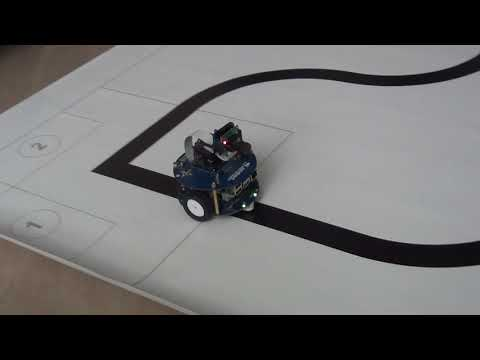

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Wth_FOiFMYo', width=800, height=455)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from loader import load_data 
sys.path.append("../src")
from alphabot.pid_module import PidController

In [3]:

data = load_data('./data/11_success_20_speed_avg_filter/2022-04-10_12:30:22.log')
sensor0=data['sensor0']
sensor1=data['sensor1']
sensor2=data['sensor2']
sensor3=data['sensor3']
sensor4=data['sensor4']
left_pid_out = data['left_pid_out']
right_pid_out = data['right_pid_out']
tm = data['tm']
actual_right_pid_out = []
print(len(tm))
dt_in_ms = np.diff(tm)/1_000_000
print(dt_in_ms)


4400
[2.430312 2.527645 2.526941 ... 2.518997 2.544978 2.529571]


### Проведем анализ прохода по линии

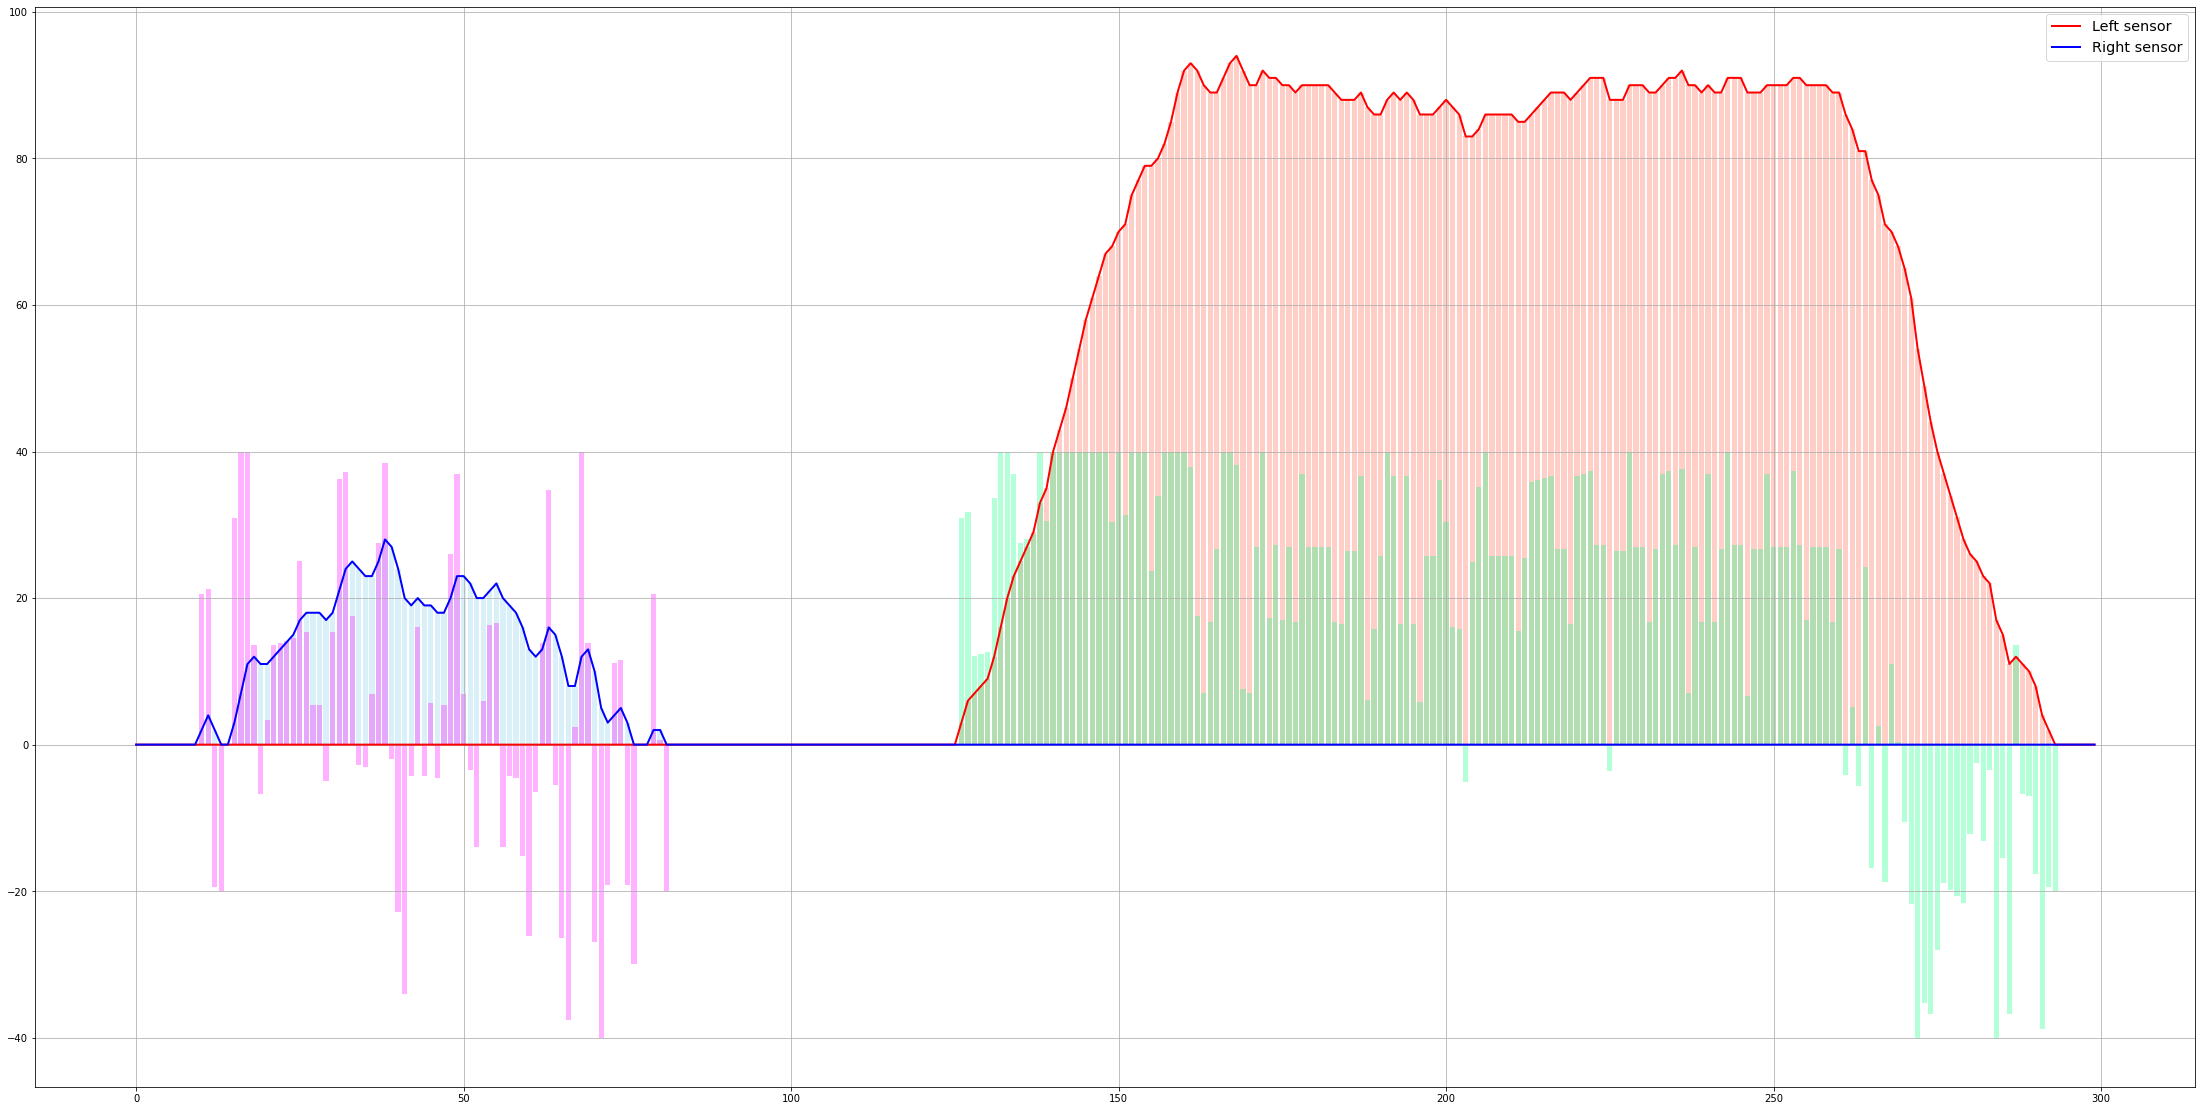

In [4]:
for i in range(0, len(left_pid_out),1):
    if left_pid_out[i] > 0 and right_pid_out[i]>0:
        if left_pid_out[i] > right_pid_out[i]:
            right_pid_out[i] = 0
        elif right_pid_out[i] > left_pid_out[i]:
            left_pid_out[i] = 0  

range_len = 300
start = 300
end = start + range_len
   
fig = plt.figure(figsize=(30, 15))
ax = fig.add_axes([0,0,1,1])
ax.plot(sensor1[start:end], linewidth=2.0, color = 'red', label='Left sensor')
ax.bar(np.arange(0,range_len,1), sensor1[start:end], color = 'tomato', alpha = 0.3)
ax.plot(sensor3[start:end], linewidth=2.0, color = 'blue', label = 'Right sensor')
ax.bar(np.arange(0,range_len,1), sensor3[start:end], color = 'skyblue', alpha = 0.3)
ax.bar(np.arange(0,range_len,1), left_pid_out[start:end], alpha = 0.3, color = 'springgreen')
ax.bar(np.arange(0,range_len,1), right_pid_out[start:end], alpha = 0.3, color = 'magenta')
ax.legend(fontsize = 'x-large')
ax.grid(True)


**Результат анализа**

Фильтр дал положительный эффект. В результате бот стабильно проходит линию на скосроти 20. При дальнейшем увеличении скорости происходит срыв. Можно попробовать увеличить ограничение выхода MAX_OUT.